In [1]:
import pandas as pd
import gdown
import gzip
from io import BytesIO
import copy
# Here we load the dataset into a Pandas DataFrame using Pandas
# Note for some reason I could no loger upload the file contianing the dataset so I decided to host the file on google drive. 
file_id = '1g_B-ms_dmZQWzuRLOBJveFN6b7sg9AJ7'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'data.csv.gz'
# The reason to us gzip is that the dataset is compressed because it is on the larger size at about 57MB
gdown.download(url, output, quiet=True)
with gzip.open(output, 'rt') as file:
# the file is a csv file 
    df = pd.read_csv(file)
# We need to copy the df for our secondary cleaning and data transformation. 
df_copy = copy.deepcopy(df)   

<ipython-input-1-183a18b708db>:15: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


#Section 1
##In this section we perform a preliminary data exploration of the dataset which can be downloaded from Kaggle [→ Dataset](https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database?select=openpowerlifting.csv)

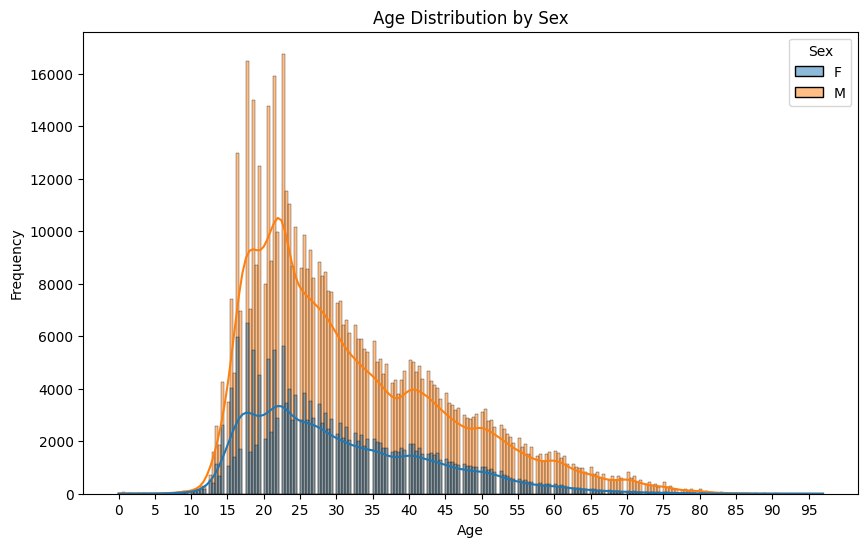

              Name Sex Event Equipment   Age AgeClass Division  BodyweightKg  \
0     Abbie Murphy   F   SBD     Wraps  29.0    24-34     F-OR          59.8   
1      Abbie Tuong   F   SBD     Wraps  29.0    24-34     F-OR          58.5   
2   Ainslee Hooper   F     B       Raw  40.0    40-44     F-OR          55.4   
3  Amy Moldenhauer   F   SBD     Wraps  23.0    20-23     F-OR          60.0   
4     Andrea Rowan   F   SBD     Wraps  45.0    45-49     F-OR         104.0   

  WeightClassKg  Squat1Kg  ...  McCulloch  Glossbrenner  IPFPoints  Tested  \
0            60      80.0  ...     324.16        286.42     511.15     NaN   
1            60     100.0  ...     378.07        334.16     595.65     NaN   
2            56       NaN  ...      38.56         34.12     313.97     NaN   
3            60    -105.0  ...     345.61        305.37     547.04     NaN   
4           110     120.0  ...     338.91        274.56     550.08     NaN   

   Country  Federation        Date  MeetCountry  M

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# we create a temporary copy of the df to display some charts 
temp = copy.deepcopy(df)
temp['Sex'] = temp['Sex'].replace({0: 'Female', 1: 'Male'})
# The folloing graph prints the distrubution of age by the sex of the lifters, this helps visualize both sexes at the same time 
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x='Age', hue='Sex', kde=True)
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 100, 5))  
plt.show()
# df.head gives a an overview of what the raw data looks like we have 37 distinct columns, most of which we will find unsuable
print(df.head())

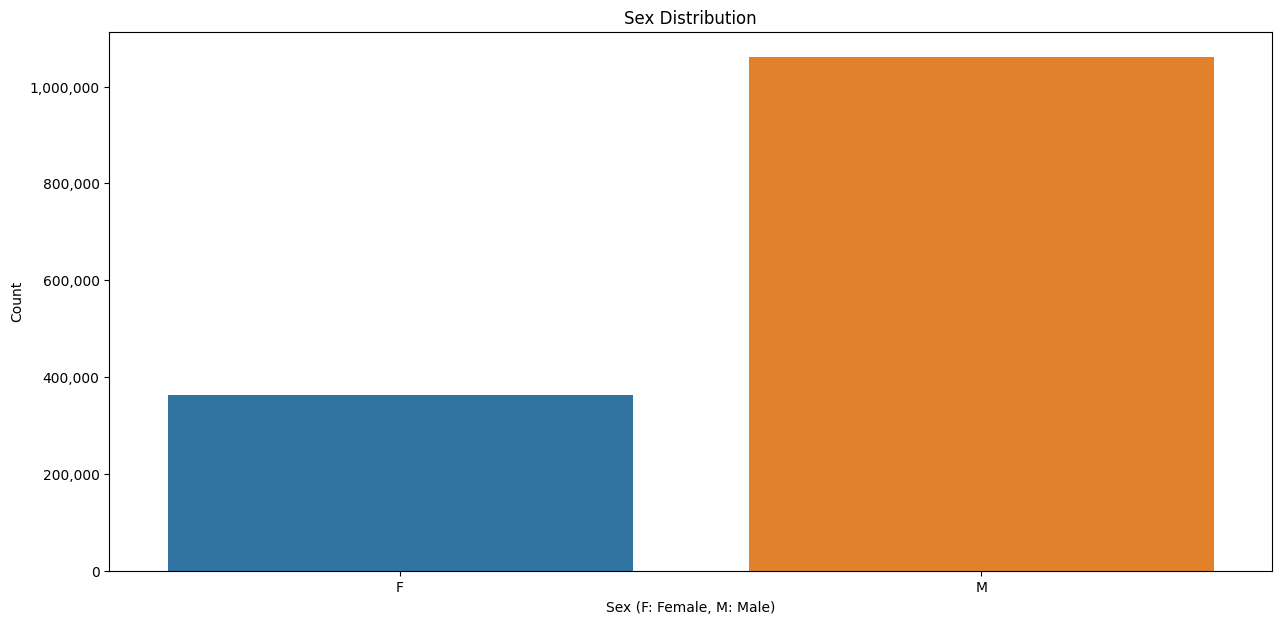

In [3]:
# This graph allows us to see how many male and female competitors are in the raw data
plt.figure(figsize=(15, 7))
axis = sns.countplot(data=df, x='Sex')
plt.title('Sex Distribution')
plt.xlabel('Sex (F: Female, M: Male)')
plt.ylabel('Count')
axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

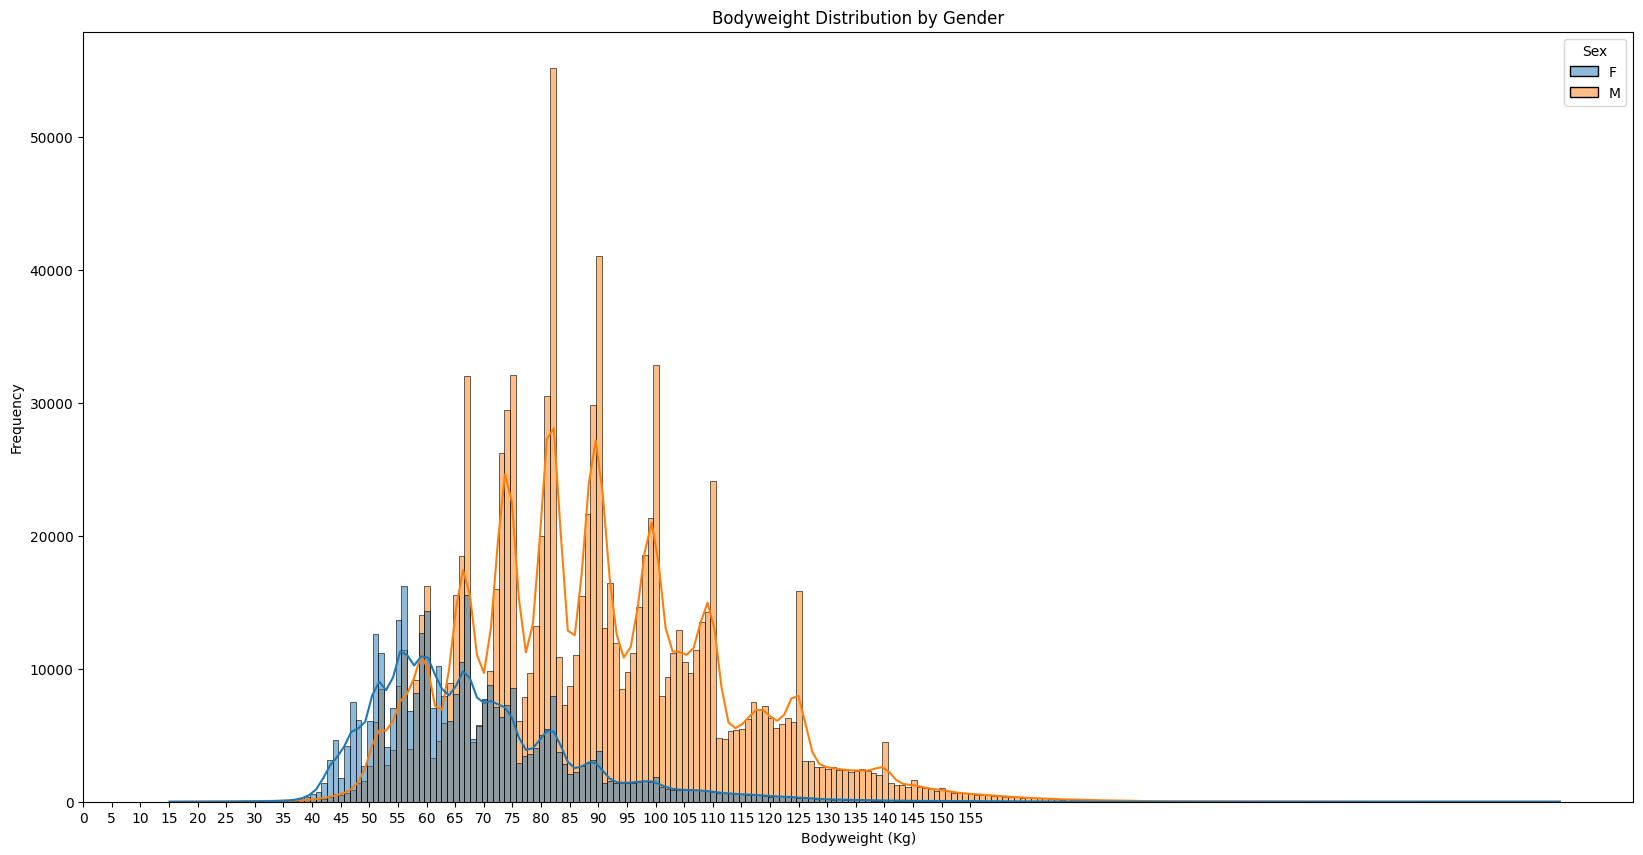

In [4]:
# This graph visulises the body weight distribution of the lifters by gender
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='BodyweightKg', hue='Sex', kde=True, discrete=True)
plt.title('Bodyweight Distribution by Gender')
plt.xlabel('Bodyweight (Kg)')
plt.ylabel('Frequency')
plt.xticks(range(0, 160, 5))  
plt.show()

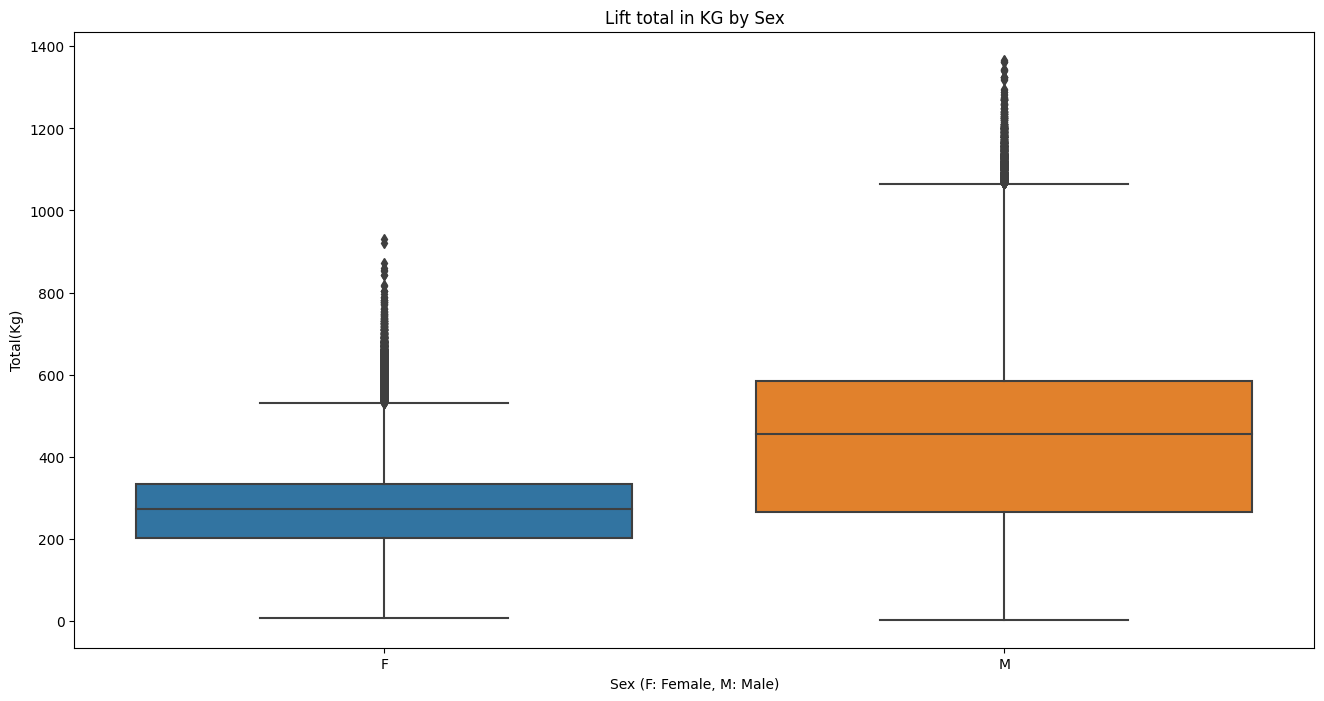

In [5]:
# The graph shows a the distribution of total weight lifted by competitors, most competitors are in the range 200 to 600 kgs, the outliers are due to equipped lifters which we be removed
# Since we care about raw powerlifting, most of the 
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='Sex', y='TotalKg')
plt.title('Lift total in KG by Sex')
plt.xlabel('Sex (F: Female, M: Male)')
plt.ylabel('Total(Kg)')
plt.show()

In [6]:
# This section provides some statistics about the raw data, as we can see we have many duplciated data and missing values
data_description = df.describe()
print(data_description)
correlation_matrix = df.corr()
print(correlation_matrix)
missing_values = df.isnull().sum()
print("Missing values count: "+str(missing_values))
total_missing_values = df.isna().sum().sum()
print("Total NaN values: "+ str(total_missing_values))
duplicated_rows_count = df.duplicated().sum()
print("Total duplicated rows count: "+str(duplicated_rows_count))
print(df.head())

                 Age  BodyweightKg       Squat1Kg       Squat2Kg  \
count  757527.000000  1.406622e+06  337580.000000  333349.000000   
mean       31.501570  8.422503e+01     114.102442      92.155846   
std        13.371707  2.322011e+01     147.143021     173.701524   
min         0.000000  1.510000e+01    -555.000000    -580.000000   
25%        21.000000  6.670000e+01      90.000000      68.000000   
50%        28.000000  8.180000e+01     147.500000     145.000000   
75%        40.000000  9.915000e+01     200.000000     205.000000   
max        97.000000  2.580000e+02     555.000000     566.990000   

            Squat3Kg     Squat4Kg  Best3SquatKg       Bench1Kg       Bench2Kg  \
count  323842.000000  3696.000000  1.031450e+06  499779.000000  493486.000000   
mean       30.056842    71.356870  1.740049e+02      83.892373      55.065745   
std       200.413385   194.522045  6.923931e+01     105.196350     130.302229   
min      -600.500000  -550.000000 -4.775000e+02    -480.000000 

<ipython-input-6-4ee2834543a3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                      Age  BodyweightKg  Squat1Kg  Squat2Kg  Squat3Kg  \
Age              1.000000      0.158509 -0.015515 -0.012730  0.014715   
BodyweightKg     0.158509      1.000000  0.161596  0.126649  0.062187   
Squat1Kg        -0.015515      0.161596  1.000000  0.148796  0.055897   
Squat2Kg        -0.012730      0.126649  0.148796  1.000000  0.128247   
Squat3Kg         0.014715      0.062187  0.055897  0.128247  1.000000   
Squat4Kg         0.054640      0.095291  0.054822  0.096211  0.065949   
Best3SquatKg     0.014667      0.604152  0.332957  0.199968  0.064689   
Bench1Kg         0.025836      0.193994  0.176815  0.127640  0.066851   
Bench2Kg        -0.003216      0.097307  0.110058  0.118657  0.101584   
Bench3Kg        -0.019552     -0.037993  0.044515  0.071562  0.099569   
Bench4Kg         0.069094      0.036419  0.071604  0.045454  0.043731   
Best3BenchKg     0.102148      0.607003  0.277993  0.160325  0.034178   
Deadlift1Kg      0.028104      0.299419  0.190362  

As we can see from the graphs a large majority of lifters are male, typically powerlifting is a male dominated sport, but it has had a rise in polularity and more woman are competing. Most of the male and female lifters are also between the ages of 15 and 45, with the highest being between ages of 20 and 25, so this is more likely where we will see the strongest athletes. The majority of male lifters are between 75 and 90 kilograms. The majority of female lifters are between 50 and 60 kilograms.

#Section 2a.
##In this section we use our primary data cleaning technique 

In [7]:
from sklearn.preprocessing import LabelEncoder
# Some coloumns arent really neccasry so we drop the irrelevant columns
df = df.drop(['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg',
              'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 
              'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 
              'Best3DeadliftKg','AgeClass','Federation','Tested','Date', 'MeetCountry', 
              'MeetState', 'MeetName','Place','Country','Wilks', 'McCulloch', 
              'Glossbrenner', 'IPFPoints','Event'], axis=1)
# We want to filter the dataset to include only raw and wraps equiment lifters
df_raw_wraps = copy.deepcopy(df)
df_raw_wraps = df_raw_wraps.loc[(df_raw_wraps['Equipment'] == 'Wraps') | (df_raw_wraps['Equipment'] == 'Raw')]
# There are varoius missing values as we can see so we drop them also we drop any values that are not numeric and we drop duplicates
df_raw_wraps.loc[:, 'Age'] = pd.to_numeric(df_raw_wraps['Age'], errors='coerce')
df_raw_wraps.loc[:, 'BodyweightKg'] = pd.to_numeric(df_raw_wraps['BodyweightKg'], errors='coerce')
df_raw_wraps.loc[:, 'WeightClassKg'] = pd.to_numeric(df_raw_wraps['WeightClassKg'], errors='coerce')
df_raw_wraps.loc[:, 'TotalKg'] = pd.to_numeric(df_raw_wraps['TotalKg'], errors='coerce')
df_raw_wraps = df_raw_wraps.drop_duplicates()
features = ['Sex','Age', 'WeightClassKg','BodyweightKg','Division']
df_raw_wraps = df_raw_wraps.dropna(subset=features)
df_raw_wraps.dropna(subset=['TotalKg'], inplace=True)

<ipython-input-7-ee73549aeeb8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_wraps.loc[:, 'Age'] = pd.to_numeric(df_raw_wraps['Age'], errors='coerce')
<ipython-input-7-ee73549aeeb8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_wraps.loc[:, 'BodyweightKg'] = pd.to_numeric(df_raw_wraps['BodyweightKg'], errors='coerce')
<ipython-input-7-ee73549aeeb8>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a n

#Section 2b.
#In this section we use our primary data processing technique

In [8]:
# Here we encode categorical columns to numerical values, we used this during lecture so I will use for this data cleaning
le = LabelEncoder()
df_raw_wraps['Sex'] = le.fit_transform(df_raw_wraps['Sex'])
df_raw_wraps['Equipment'] = le.fit_transform(df_raw_wraps['Equipment'])
df_raw_wraps['Division'] = le.fit_transform(df_raw_wraps['Division'])
# In this section we are normalizing the features using sklearn, and defining X and y, X refers to our feature data that we will use to predict our target variable y
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaleable_features = ['Age', 'WeightClassKg','BodyweightKg']
df_raw_wraps[scaleable_features] = scaler.fit_transform(df_raw_wraps[scaleable_features])
X = df_raw_wraps[features]
y = df_raw_wraps['TotalKg']
# We make a copy of the dataframe since we want to unscale the values as we will need to use this for data analysis
df_unscaled = df_raw_wraps.copy()
df_unscaled[scaleable_features] = scaler.inverse_transform(df_raw_wraps[scaleable_features])

<ipython-input-8-808cf907411f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_wraps['Sex'] = le.fit_transform(df_raw_wraps['Sex'])


#Section 3a.
##In this section we utilize a different data cleaning technique 


In [9]:
# Instead of dropping coloumns we just keep the columns of our features and totalkg which is what we are trying to predict 
df_copy = df_copy[['Sex', 'Equipment', 'Age', 'WeightClassKg', 'BodyweightKg', 'TotalKg']]
df_copy = df_copy.dropna(subset=['TotalKg'])
df_copy = df_copy.drop_duplicates()
df_copy =  df_copy[df_copy['Equipment'].isin(['Raw', 'Wraps'])]
df_copy.reset_index(drop=True, inplace=True)
temp = ['Age','BodyweightKg', 'TotalKg']
for i in range(len(temp)):
  df_copy[temp[i]] = pd.to_numeric(df_copy[temp[i]], errors='coerce')
df_copy['WeightClassKg'] = df_copy['WeightClassKg'].str.replace('+', '')
df_copy['WeightClassKg'] = pd.to_numeric(df_copy['WeightClassKg'], errors='coerce')

<ipython-input-9-882e637e4d89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[temp[i]] = pd.to_numeric(df_copy[temp[i]], errors='coerce')
<ipython-input-9-882e637e4d89>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy['WeightClassKg'] = df_copy['WeightClassKg'].str.replace('+', '')
<ipython-input-9-882e637e4d89>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

#Section 3b.
#In this section we use our secondary data processing technique

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
# We will utilize one-hot encoding for categorical features
OHE = OneHotEncoder(sparse=False)
Encoded_Sex = OHE.fit_transform(df_copy[['Sex']])
sex_columns = OHE.categories_[0].tolist()
df_raw_wraps_encoded = pd.DataFrame(Encoded_Sex, columns=sex_columns, index=df_copy.index)
Encoded_Equipment = OHE.fit_transform(df_copy[['Equipment']])
equipment_columns = OHE.categories_[0].tolist()
df_raw_wraps_encoded = pd.concat([df_raw_wraps_encoded, pd.DataFrame(Encoded_Equipment, columns=equipment_columns, index=df_copy.index)], axis=1)
# We have many missing values in the dataset on way to handle the missing values is to inmpute the missing values using the mean of each column
im = SimpleImputer(strategy='mean')
temp = df_copy[['Age', 'WeightClassKg', 'BodyweightKg']]
imputed_df = pd.DataFrame(im.fit_transform(temp), columns=temp.columns, index=temp.index)
df_raw_wraps_encoded  = pd.concat([df_raw_wraps_encoded, imputed_df], axis=1)

# Here we  normalize age. wight class, and body weight
MMS = MinMaxScaler()
scaled_data = MMS.fit_transform(df_raw_wraps_encoded[['Age', 'WeightClassKg', 'BodyweightKg']])
df_raw_wraps_encoded[['Age', 'WeightClassKg', 'BodyweightKg']] = scaled_data

X_prime = df_raw_wraps_encoded
y_prime = df_copy['TotalKg']

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#Section 4.
##In this section we split the dataset into training and testing

In [11]:
# In this section we are spliting the data into training and testing for both techniques used
# a common test split we discussed is 10% testing with 10% validation and 80% training the random state is set to 7
from sklearn.model_selection import train_test_split
 #Here we split the data of our initial data processing and cleaning into training, testing and validation.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=.5, random_state=7)
# Here we split the data of our alternative data processing and cleaning into training, testing and validation. 
X_prime_train, X_prime_temp, y_prime_train, y_prime_temp = train_test_split(X_prime, y_prime, test_size=0.3, random_state=7)
X_prime_val, X_prime_test, y_prime_val, y_prime_test = train_test_split(X_prime_temp, y_prime_temp, test_size=0.33, random_state=7)

X_unscaled = df_unscaled[features]
y_unscaled = df_unscaled['TotalKg']
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.2, random_state=7)

#Section 5a.
##In this section we perform data analysis on the male training subset

-----------------------------------------------------
Descriptive statistics of male competitors:
                 Age   BodyweightKg
count  231672.000000  231672.000000
mean       31.354441      89.737960
std        13.405141      18.080501
min         2.500000      17.690000
25%        21.500000      76.500000
50%        27.500000      88.900000
75%        38.500000     101.500000
max        95.500000     155.000000
-----------------------------------------------------


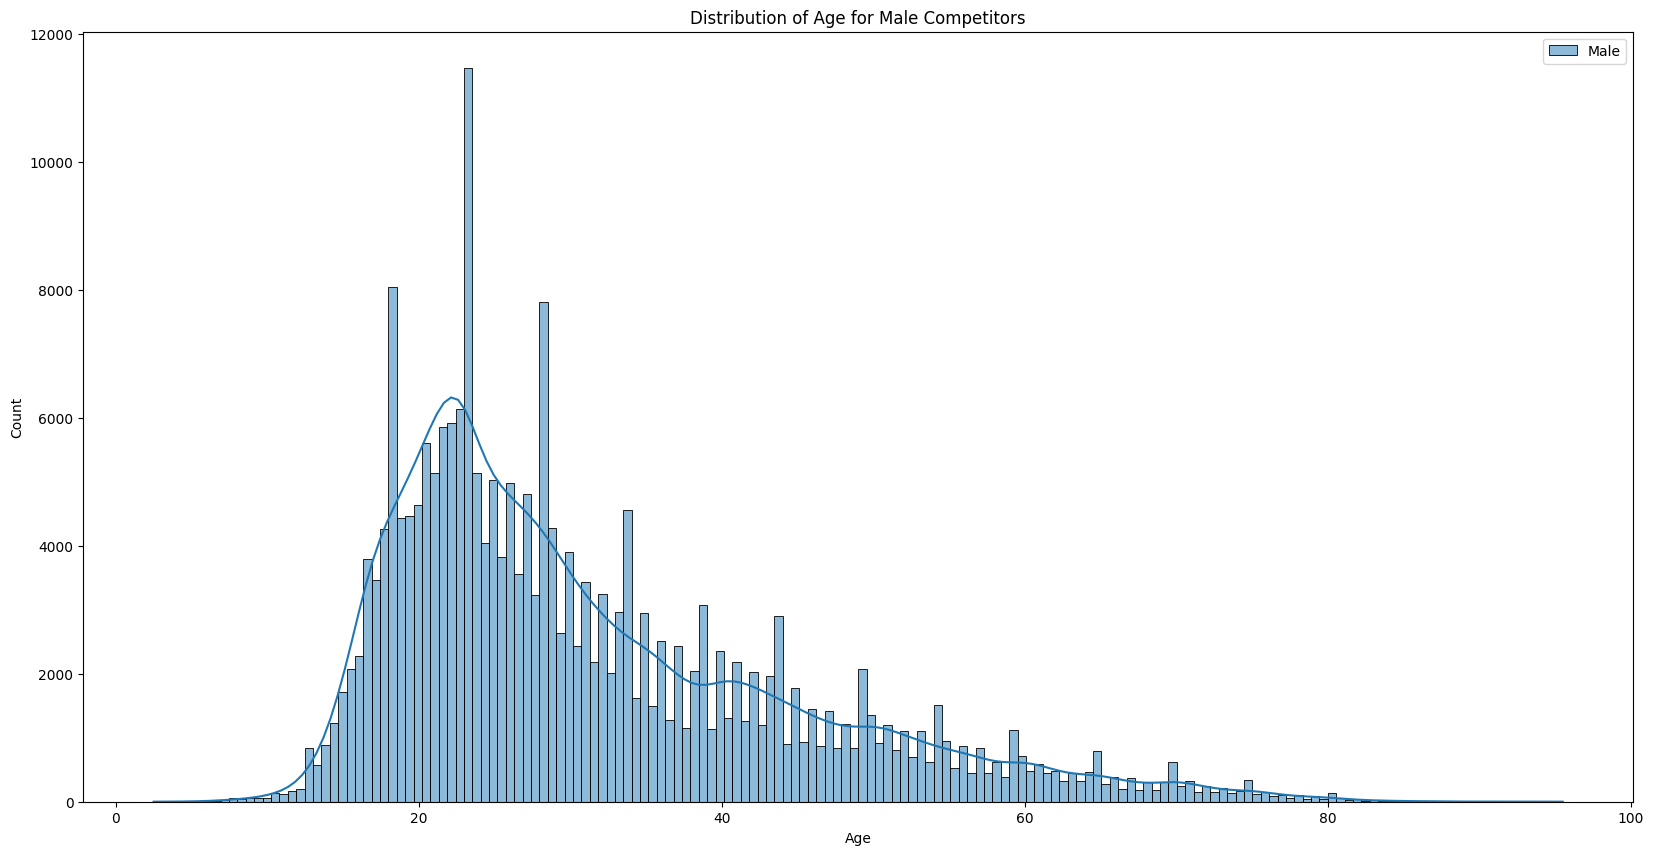

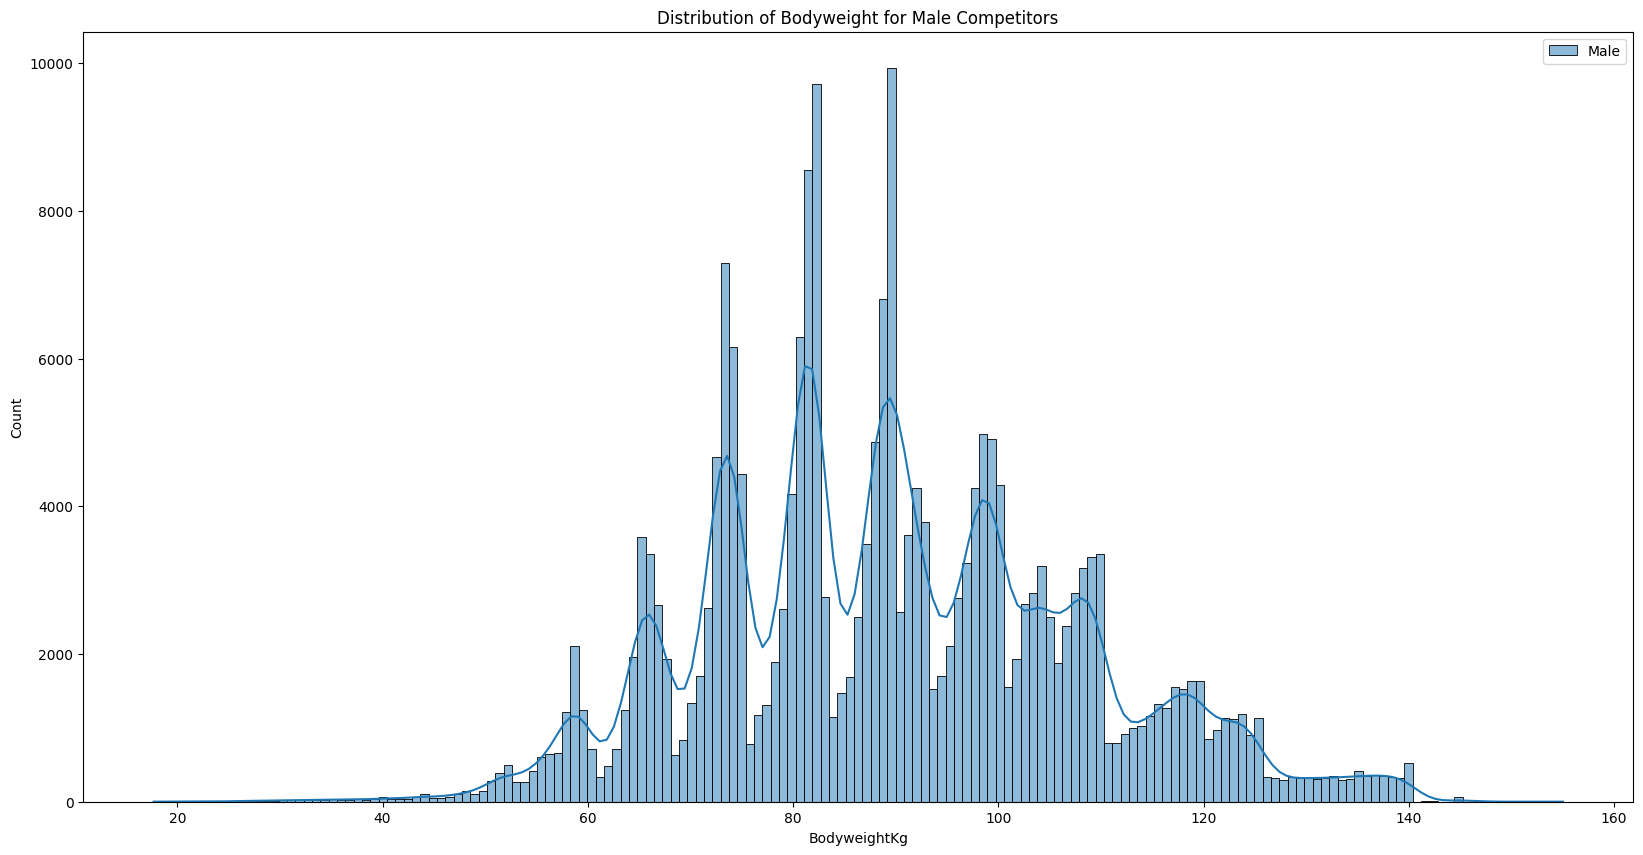

In [12]:
# In this section we look at the despritve statistics of the male competitors
male_df = X_train_unscaled[X_train_unscaled['Sex'] == 1]
print('-----------------------------------------------------')
print("Descriptive statistics of male competitors:")
print(male_df[['Age', 'BodyweightKg']].describe())
print('-----------------------------------------------------')
plt.figure(figsize=(20, 10))
sns.histplot(data=male_df, x='Age', kde=True, label='Male')
plt.legend()
plt.title('Distribution of Age for Male Competitors')
plt.show()

plt.figure(figsize=(20, 10))
sns.histplot(data=male_df, x='BodyweightKg', kde=True, label='Male')
plt.legend()
plt.title('Distribution of Bodyweight for Male Competitors')
plt.show()

#Section 5b.
##In this section we perform data analysis on the female training subset

-----------------------------------------------------
Descriptive statistics of female competitors:
                Age  BodyweightKg
count  84788.000000  84788.000000
mean      31.289215     64.816118
std       12.083642     11.200386
min        0.500000     15.880000
25%       22.500000     56.200000
50%       28.500000     63.800000
75%       38.500000     72.050000
max       97.000000    125.000000
-----------------------------------------------------


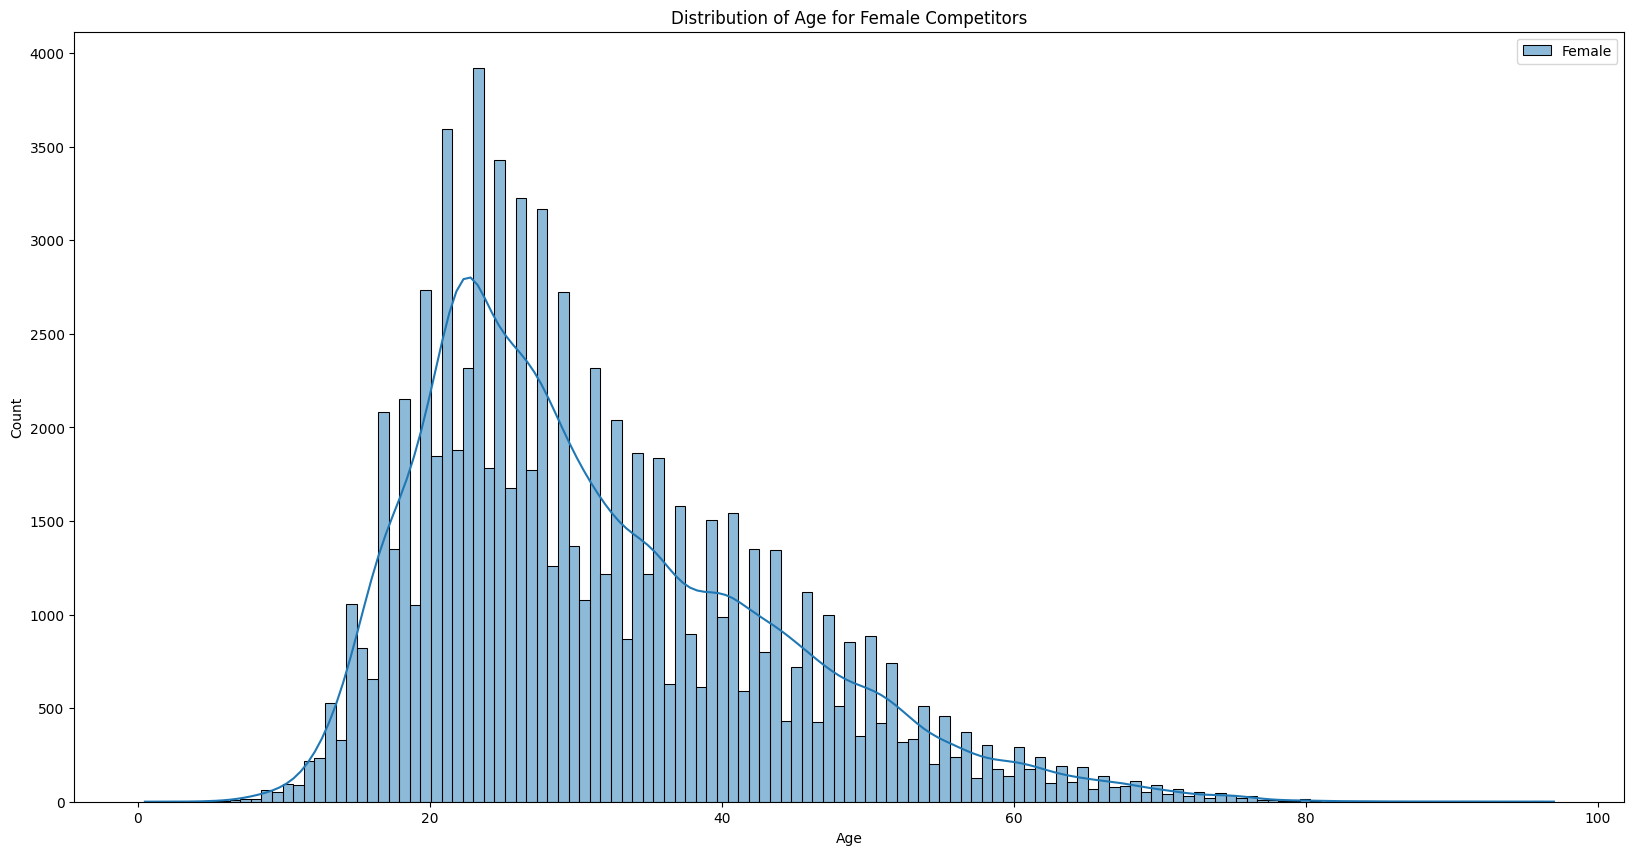

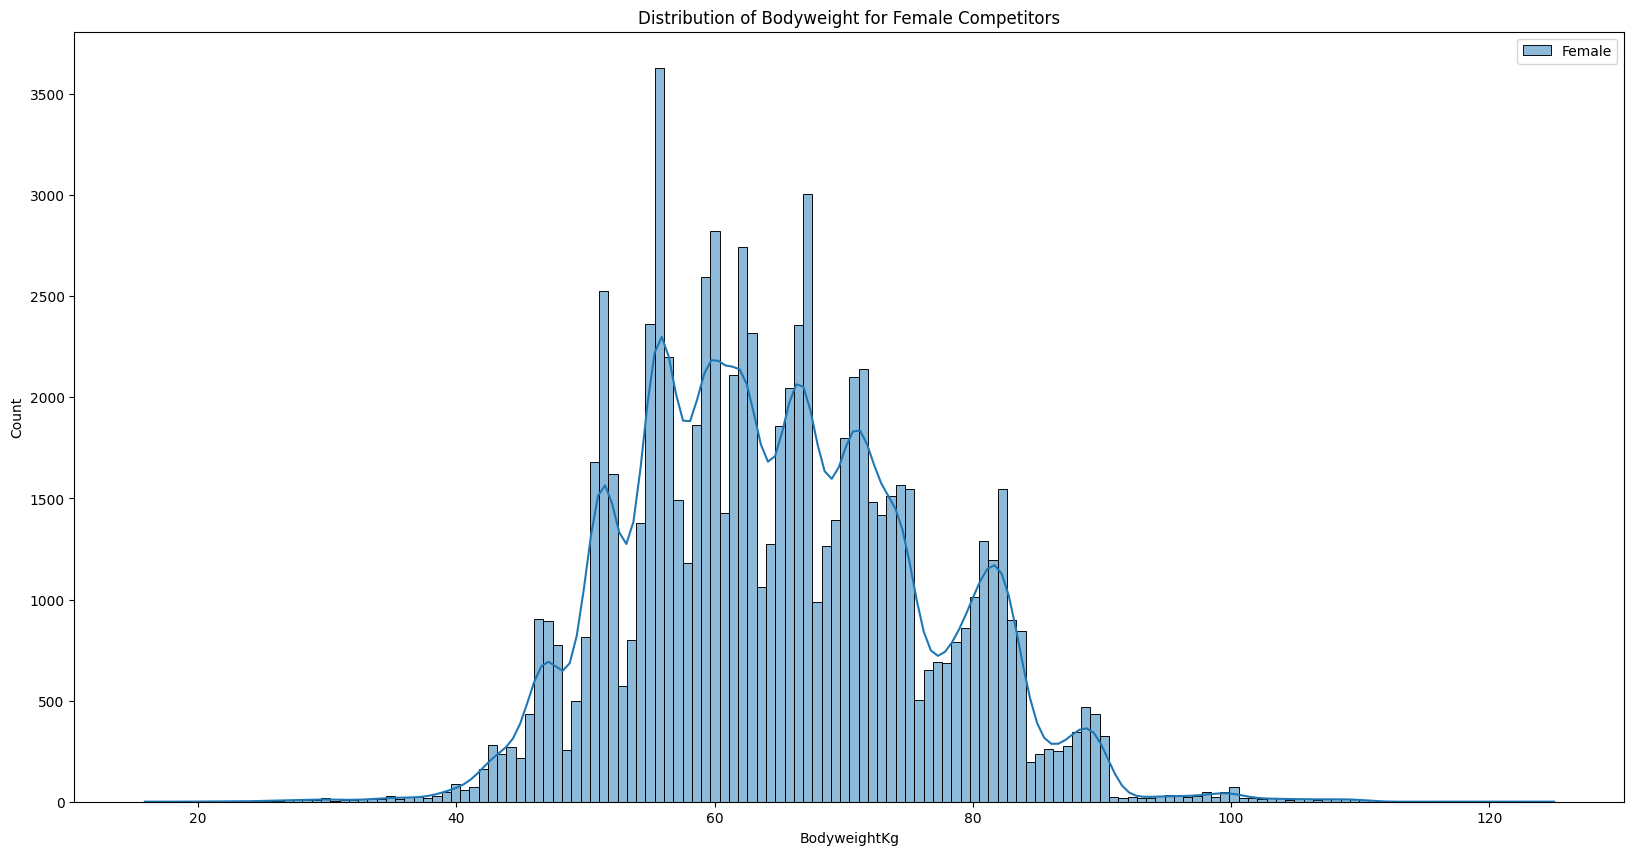

In [13]:
# In this section we look at the despritve statistics of the female competitors
female_df = X_train_unscaled[X_train_unscaled['Sex'] == 0]
print('-----------------------------------------------------')
print("Descriptive statistics of female competitors:")
print(female_df[['Age', 'BodyweightKg']].describe())
print('-----------------------------------------------------')
plt.figure(figsize=(20, 10))
sns.histplot(data=female_df, x='Age', kde=True, label='Female')
plt.legend()
plt.title('Distribution of Age for Female Competitors')
plt.show()

plt.figure(figsize=(20, 10))
sns.histplot(data=female_df, x='BodyweightKg', kde=True, label='Female')
plt.legend()
plt.title('Distribution of Bodyweight for Female Competitors')
plt.show()

#Sections 7a-7b is used for fine tuning the models, the performance of the model is evaluated on the validation set. We define a function that allows us to evaluate model performance. 

In [14]:
def evaluate_model(model, X_train, y_train, X_val, y_val, title):
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)

    plt.figure(figsize=(10, 5))
    plt.scatter(y_val, y_pred_val, alpha=0.5)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(title)
    plt.show()

    mae = mean_absolute_error(y_val, y_pred_val)
    mse = mean_squared_error(y_val, y_pred_val)
    r2 = r2_score(y_val, y_pred_val)
    print("Mean Absolute Error: " + str(mae))
    print("Mean Squared Error: " + str(mse))
    print("R-squared: " + str(r2))

#Section 6. 
#In this section we implement a base model

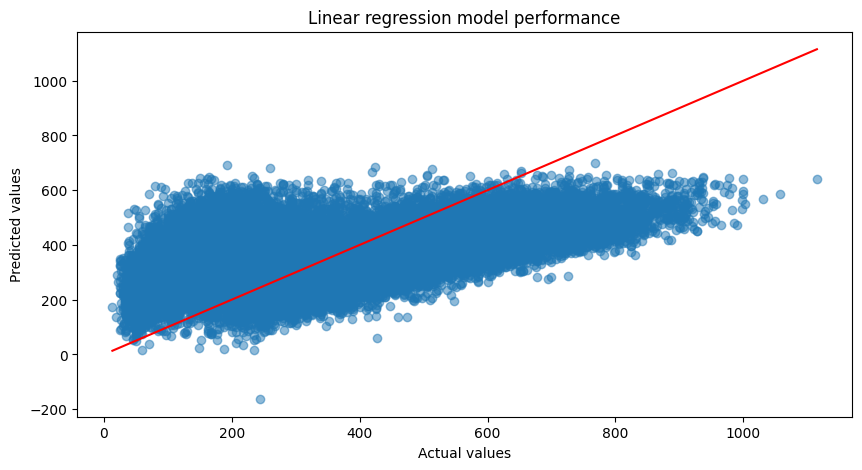

Mean Absolute Error: 149.03692628018624
Mean Squared Error: 31114.539205523048
R-squared: 0.24317267369691398


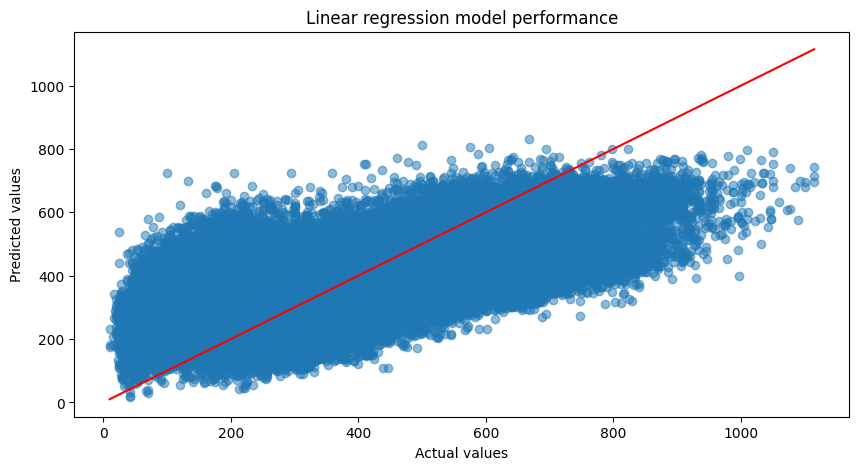

Mean Absolute Error: 140.8475128547402
Mean Squared Error: 27620.004192423316
R-squared: 0.33162761874234414


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# We implement linear regression and print the models performance
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_val, y_val, 'Linear regression model performance')
evaluate_model(lr, X_prime_train, y_prime_train, X_prime_val, y_prime_val, 'Linear regression model performance')

#Section 7a.
## In this section we implement KNN

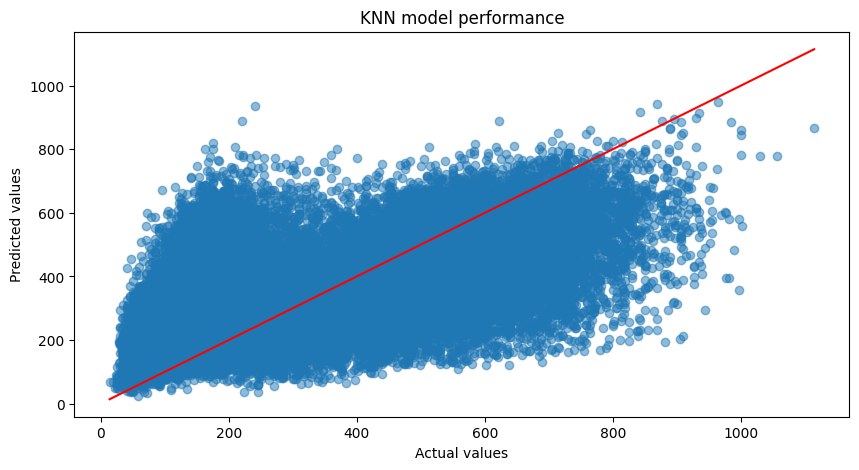

Mean Absolute Error: 129.9284232373537
Mean Squared Error: 28735.49088119251
R-squared: 0.3010404367563557


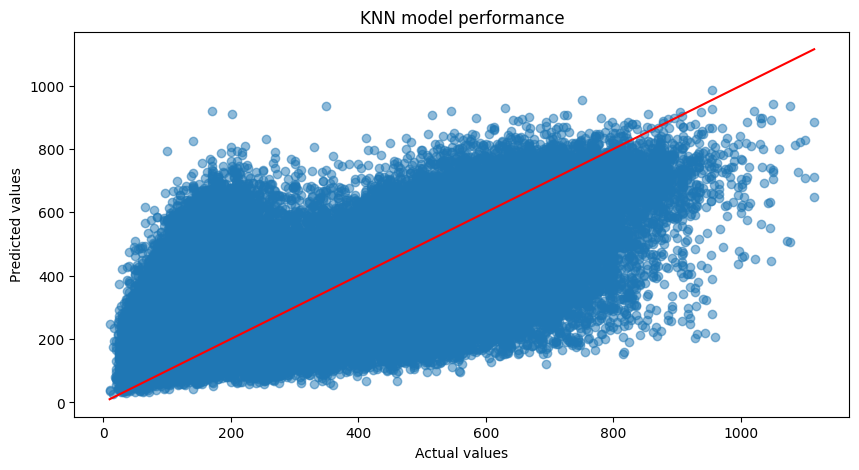

Mean Absolute Error: 122.56268874051409
Mean Squared Error: 25427.84724494765
R-squared: 0.3846752992881982


In [16]:
from sklearn.neighbors import KNeighborsRegressor
# We implement KKN alorithm we start with k = 5
knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, X_train, y_train, X_val, y_val, 'KNN model performance')
evaluate_model(knn, X_prime_train, y_prime_train, X_prime_val, y_prime_val, 'KNN model performance')

#Section 7b. 
## In this section we implement MLP

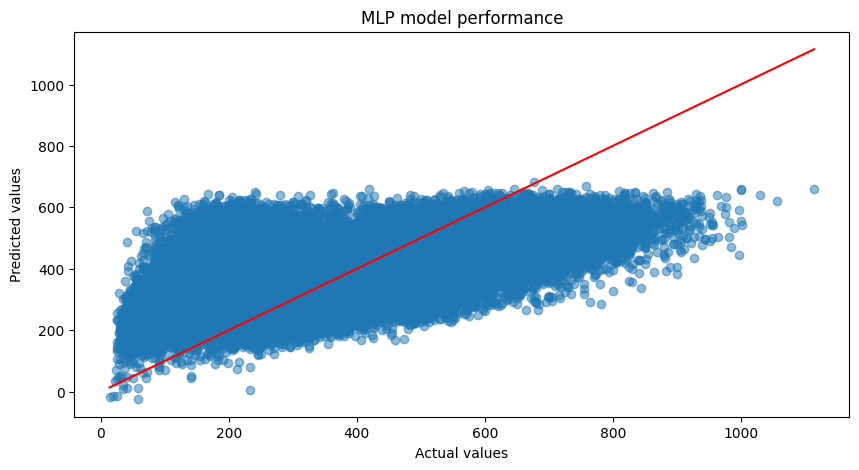

Mean Absolute Error: 135.41043254080915
Mean Squared Error: 28017.956156034612
R-squared: 0.3184936885620092


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


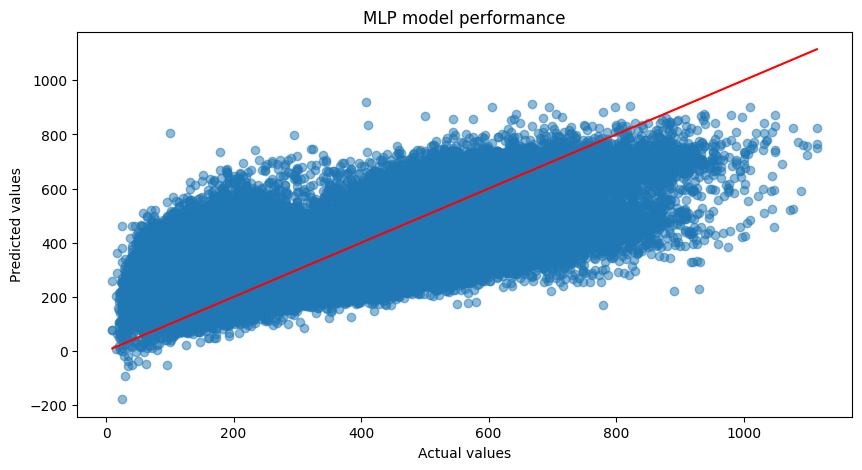

Mean Absolute Error: 129.89485201812323
Mean Squared Error: 24898.968521083167
R-squared: 0.3974735570148493


In [17]:
from sklearn.neural_network import MLPRegressor
# We implment MLP the activation is relu, with 100 hidden layers, random state is as usual 7. 
mlp = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 100),
    alpha=0.001,
    random_state=7,
    early_stopping=False
)
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'MLP model performance')
evaluate_model(mlp, X_prime_train, y_prime_train, X_prime_val, y_prime_val, 'MLP model performance')

#Section 8. 
## In this section we look at training performance and validation performance. We define a function model_performance, this allows us to see if the model overfit or underfit. 

In [18]:
def model_performance(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)
    print("Model: "+ model_name)
    print("Training performance:")
    print("Mean Absolute Error: " + str(mae_train))
    print("Mean Squared Error: " + str(mse_train))
    print("R-squared: " + str(r2_train))
    print("Validation performance:")
    print("Mean Absolute Error: " + str(mae_val))
    print("Mean Squared Error: " + str(mse_val))

In [19]:
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=7)
mlp = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 100),
    alpha=0.001,
    random_state=7,
    early_stopping=False
)
model_performance(lr, X_train, y_train, X_val, y_val,"Linear regression orginal data cleaning and proccesing")
model_performance(lr, X_prime_train, y_prime_train, X_prime_val, y_prime_val,"Linear regression alternative data cleaning and proccesing")

model_performance(knn, X_train, y_train, X_val, y_val, "K Nearest Neighbor orginal data cleaning and proccesing")
model_performance(knn, X_prime_train, y_prime_train, X_prime_val, y_prime_val,"K Nearest Neighbor alternative data cleaning and proccesing")

model_performance(mlp, X_train, y_train, X_val, y_val, "Mutilayer perceptron orginal data cleaning and proccesing")
model_performance(mlp, X_prime_train, y_prime_train, X_prime_val, y_prime_val,"Mutilayer perceptron alternative data cleaning and proccesing")

Model: Linear regression orginal data cleaning and proccesing
Training performance:
Mean Absolute Error: 149.27090152337968
Mean Squared Error: 31157.59819147712
R-squared: 0.2475899161253794
Validation performance:
Mean Absolute Error: 149.03692628018624
Mean Squared Error: 31114.539205523048
Model: Linear regression alternative data cleaning and proccesing
Training performance:
Mean Absolute Error: 141.2584858062405
Mean Squared Error: 27785.409727887098
R-squared: 0.32870425310137497
Validation performance:
Mean Absolute Error: 140.8475128547402
Mean Squared Error: 27620.004192423316
Model: K Nearest Neighbor orginal data cleaning and proccesing
Training performance:
Mean Absolute Error: 110.8707335614521
Mean Squared Error: 20701.13518873826
R-squared: 0.500098089463166
Validation performance:
Mean Absolute Error: 128.28580652151143
Mean Squared Error: 27492.31904673019
Model: K Nearest Neighbor alternative data cleaning and proccesing
Training performance:
Mean Absolute Error: 106

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Mutilayer perceptron alternative data cleaning and proccesing
Training performance:
Mean Absolute Error: 130.0991947118325
Mean Squared Error: 25014.240899441553
R-squared: 0.39565571671814004
Validation performance:
Mean Absolute Error: 129.89485201812323
Mean Squared Error: 24898.968521083167


#Section 9. 
## In this section we train and evaluate the performance of the model on the test set. We also time the each model and obtain the memory size of the model. We define a function train_and_evaluate, which returns total_training_time, memory_size, mae_test, mse_test, r2_test.

In [45]:
import time
import sys

def train_and_evaluate(model, X_train, y_train, X_test, y_test,model_name):
  start = time.time()
  model.fit(X_train, y_train)
  end = time.time()
  total_training_time = end - start
  memory_size = sys.getsizeof(model)
    
  y_pred_test = model.predict(X_test)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  r2_test = r2_score(y_test, y_pred_test)
    
  return  [model_name,total_training_time, memory_size, mae_test, mse_test, r2_test]

def display_results(Original, Alternative):
  print("Model:" +str(Original[0]))
  columns = ['model_name', 'Training Time', 'Memory Size', 'MAE', 'MSE', 'R^2']
  df = pd.DataFrame([Original, Alternative], columns=columns)
  for i in columns[1:]:
    print("Attribute : " +str(i))
    ax = df[i].plot(kind='bar', figsize=(6, 4), color=['blue', 'orange'])
    ax.set_ylabel('Value')
    ax.set_title(f'Comparison of {i} between original and alternative data cleaning and processing')
    ax.legend(['Original', 'Alternative'])
    plt.tight_layout()
    plt.show()
    
def print_results(results):
  print('--------------------------------------------')
  print("Model name: " + str(results[0]))
  print("Total training time : " + str(results[1]) + " seconds")
  print("Memory size: " + str(results[2]) + " bytes")
  print("Mean Absolute Error (MAE): " + str(results[3]))
  print("Mean Squared Error (MSE): " + str(results[4]))
  print("R^2 score: " + str(results[5]))
  print('--------------------------------------------')

In [46]:
lr = LinearRegression()
Original_lr = train_and_evaluate(lr, X_train, y_train, X_test, y_test,"linear regression")
Alternative_lr = train_and_evaluate(lr, X_prime_train, y_prime_train, X_prime_test, y_prime_test,"linear regression")

In [47]:
knn = KNeighborsRegressor(n_neighbors=7)
Original_knn=  train_and_evaluate(knn, X_train, y_train, X_test, y_test," k-nearest-neighbor")
Alternative_knn = train_and_evaluate(knn, X_prime_train, y_prime_train, X_prime_test, y_prime_test," k-nearest-neighbor")

In [48]:
mlp = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 100),
    alpha=0.001,
    random_state=7,
    early_stopping=False
)
Original_mlp = train_and_evaluate(mlp, X_train, y_train, X_test, y_test,"multilayer perceptron")
Alternative_mlp = train_and_evaluate(mlp, X_prime_train, y_prime_train, X_prime_test, y_prime_test,"multilayer perceptron")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#Section 10. 
## In this section we print and display results, print_results shows us numercially the results, display_results shows us visually 

In [49]:
print_results(Original_lr)
print_results(Alternative_lr)
print_results(Original_knn)
print_results(Alternative_knn)
print_results(Original_mlp)
print_results(Alternative_mlp)

--------------------------------------------
Model name: linear regression
Total training time : 0.05846357345581055 seconds
Memory size: 48 bytes
Mean Absolute Error (MAE): 148.56010580663022
Mean Squared Error (MSE): 30980.337804732517
R^2 score: 0.2505673863799529
--------------------------------------------
--------------------------------------------
Model name: linear regression
Total training time : 0.10296964645385742 seconds
Memory size: 48 bytes
Mean Absolute Error (MAE): 140.77681677226255
Mean Squared Error (MSE): 27644.238058774758
R^2 score: 0.33121514168764
--------------------------------------------
--------------------------------------------
Model name:  k-nearest-neighbor
Total training time : 0.37544870376586914 seconds
Memory size: 48 bytes
Mean Absolute Error (MAE): 127.8504918275516
Mean Squared Error (MSE): 27358.322241304737
R^2 score: 0.3381860756073347
--------------------------------------------
--------------------------------------------
Model name:  k-ne

Model:linear regression
Attribute : Training Time


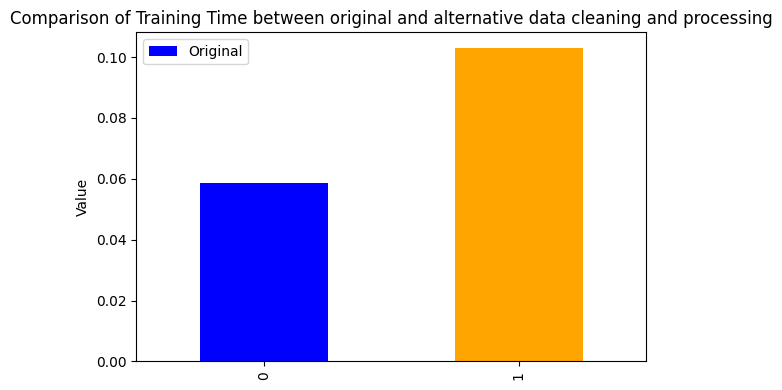

Attribute : Memory Size


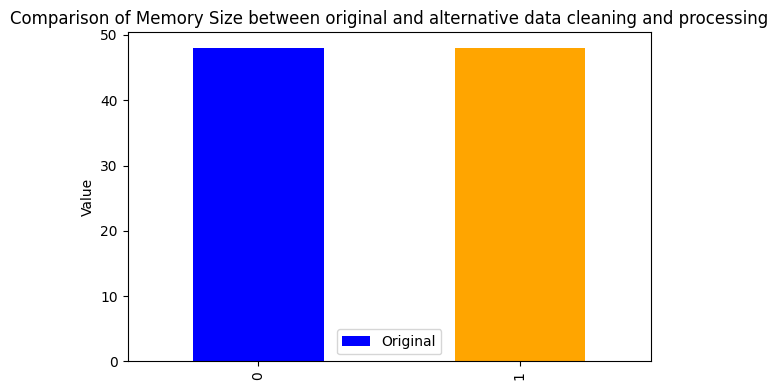

Attribute : MAE


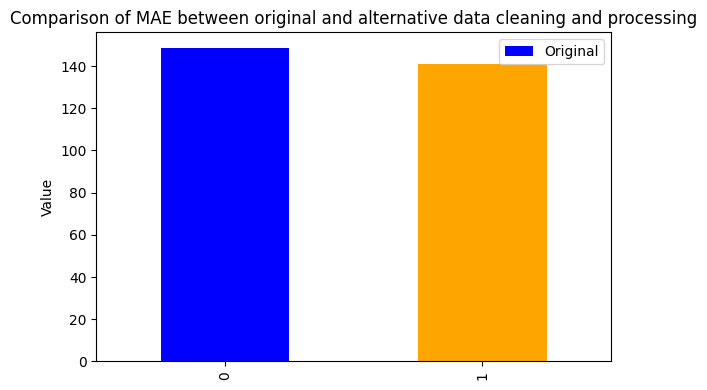

Attribute : MSE


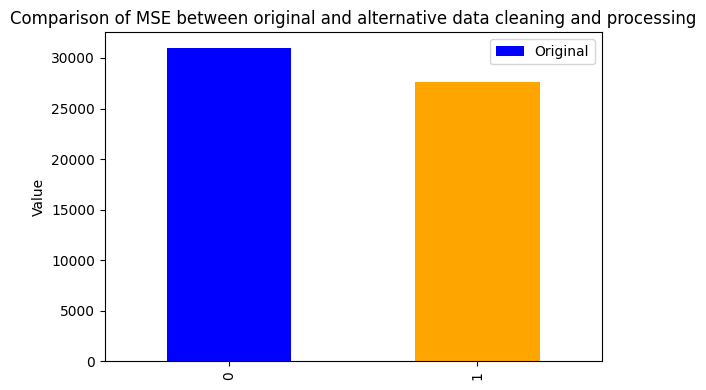

Attribute : R^2


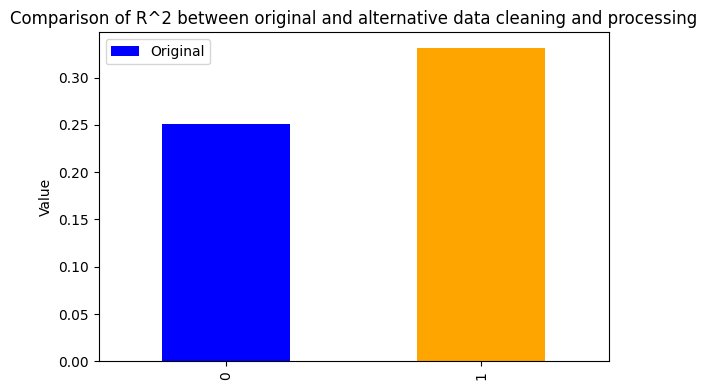

Model: k-nearest-neighbor
Attribute : Training Time


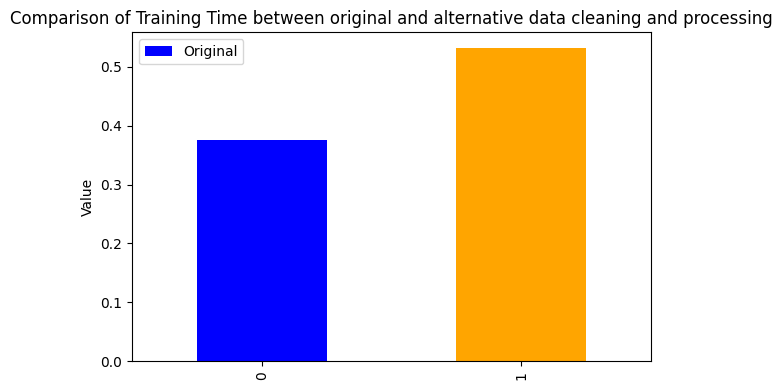

Attribute : Memory Size


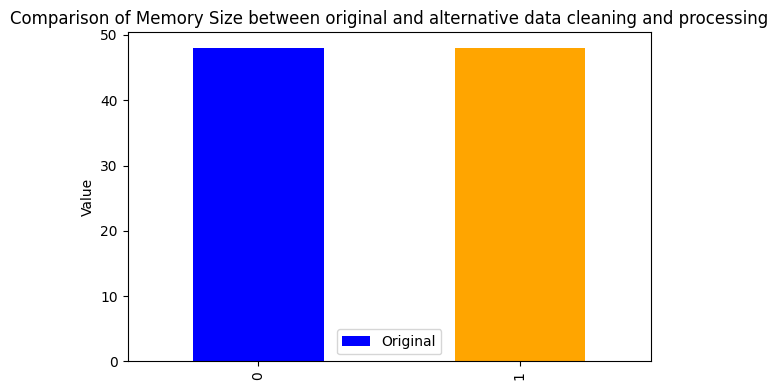

Attribute : MAE


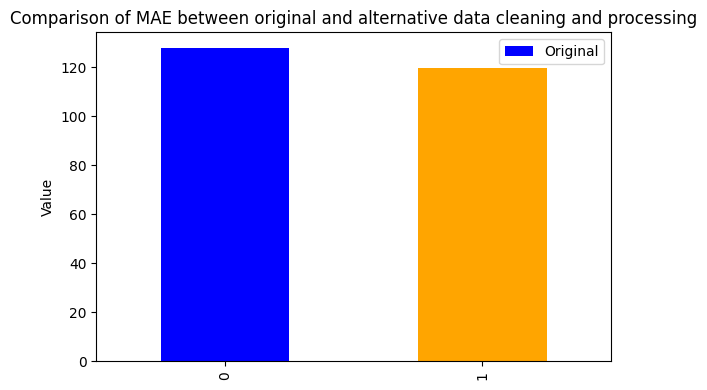

Attribute : MSE


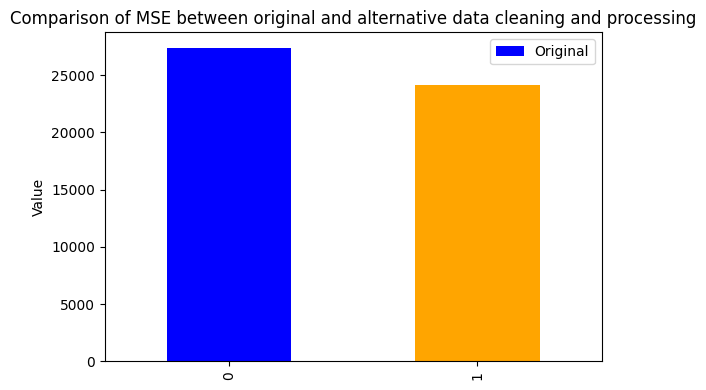

Attribute : R^2


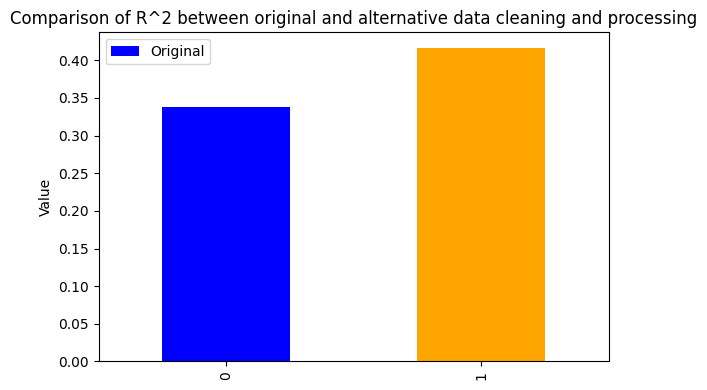

Model:multilayer perceptron
Attribute : Training Time


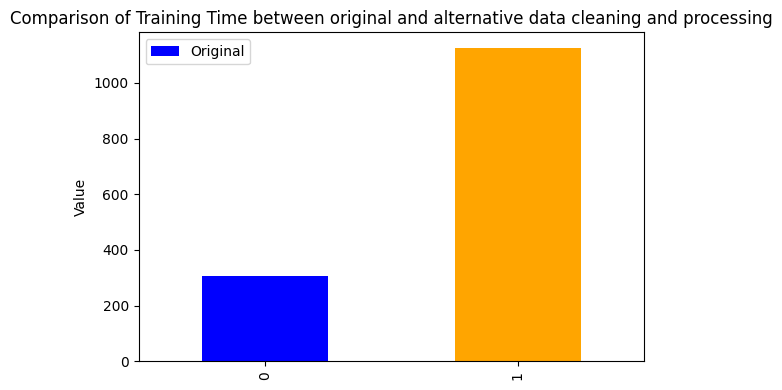

Attribute : Memory Size


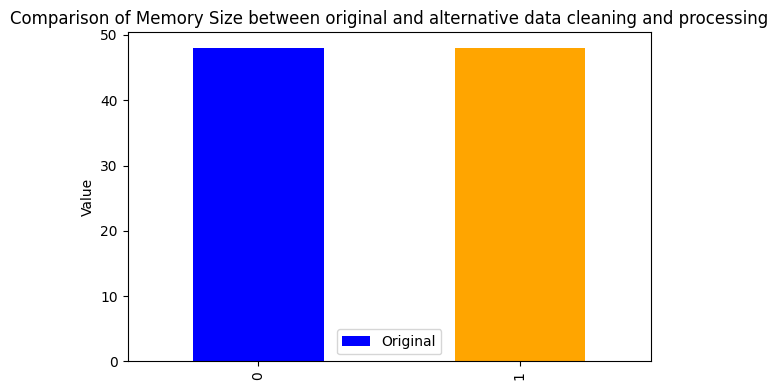

Attribute : MAE


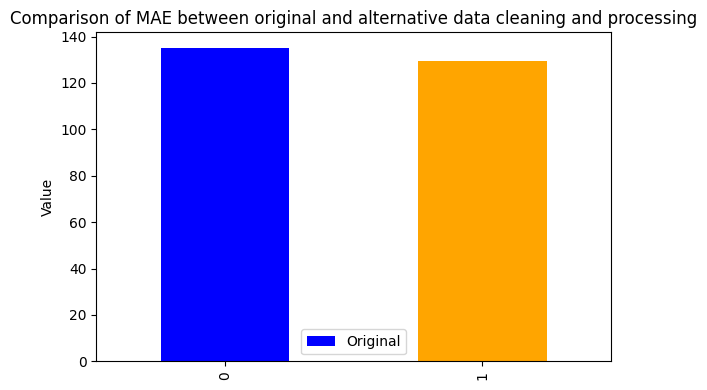

Attribute : MSE


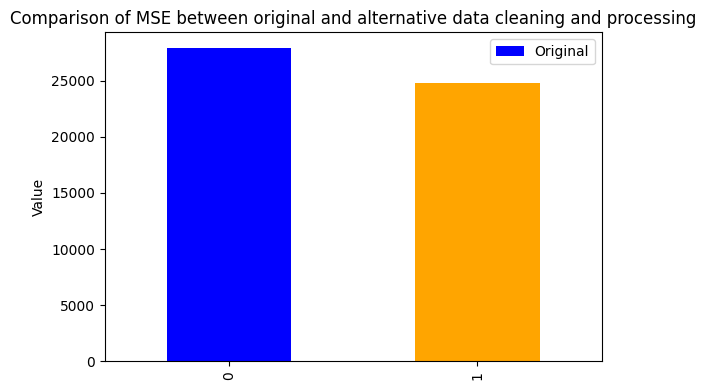

Attribute : R^2


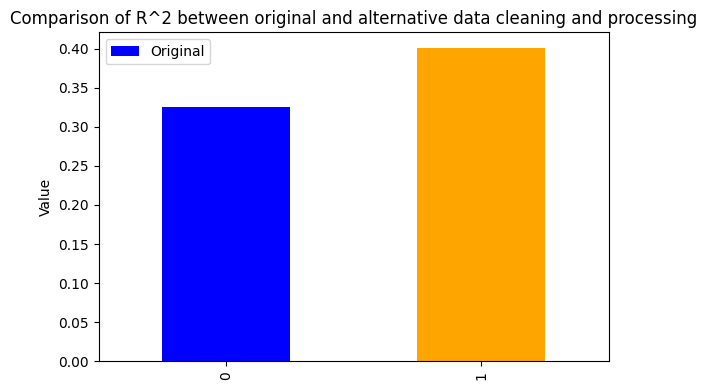

In [50]:
display_results(Original_lr, Alternative_lr)
display_results(Original_knn, Alternative_knn)
display_results(Original_mlp, Alternative_mlp)